In [1]:
import numpy as np
import math
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Homemade Un-Normalized, n-Dimensional, Binary KNN Classifier:

In [2]:
def knn():
    input_data = pd.read_csv('C://Users//fergu//input.csv', index_col=0)

    outcome_variable = input("Enter the name of the variable you are trying to predict:")
    user_input = (input("Your comma-separated values in same order as the dataFrame, e.g. 2,6,3:"))
    input_list = user_input.split(',')
    neighbors = int(input("Enter the number of neighbors you want to consider:"))
       
    dimensions = len(input_data.columns) - 1
    # Remove the column containing the variable to be predicted and work with the others:
    variables_frame = input_data.drop(str(outcome_variable), axis=1)
    # Create column to hold the (pythagorean) distance from the input 'point' to the 'point'
    # ...represented by each row in n-dimensional space:
    variables_frame['distance'] = None 
    
    # For each row i....:
    for i in range(0, len(variables_frame)):
        multiplied_values = 0
    # ...Iterate over columns j:
        for j in range(0, len(variables_frame.columns) - 1): 
    # Calculate the distance from the input point to the point represented by row i
    # ... i.e. Pythagoras' Theorem generalized over any no. of dimensions:
            multiplied_values += (abs(int(input_list[j]) - variables_frame.iloc[i][j]))**2     
        variables_frame['distance'][i] = multiplied_values**(1 / 2)
    
    # Having computed all 'distances', sort their INDICES from shortest to longest: 
    sdi_almostfinal = (variables_frame['distance']).argsort()
    # find the indices of the lowest (shortest) values based on no. of neighbors:
    sdi_final = list(sdi_almostfinal[:neighbors])

    variables_frame[outcome_variable] = input_data[outcome_variable]
 
    if dimensions == 2:
        plt.figure(figsize=(15, 8))
        
        plt.scatter(input_data[input_data[outcome_variable] == 0].iloc[0],
                    input_data[input_data[outcome_variable] == 0].iloc[1],
                    color='red')
        plt.scatter(input_data[input_data[outcome_variable] == 1].iloc[0],
                    input_data[input_data[outcome_variable] == 1].iloc[1],
                    color='green')
        plt.autoscale(enable=True)
        plt.xlim(0, (input_data.iloc[0]).max())
        plt.ylim(0, (input_data.iloc[1]).max())         
        plt.title('Your chosen variables plotted in 2-D space')
        plt.show()
#    else:
#        print('Cannot produce plot for {}-dimensional space'.format(dimensions))
    
    # Compute a total where each of the shortest neighbors gets a 'vote':
    aggregate = [variables_frame[outcome_variable][index] for index in sdi_final]
    # The mean of these is the predicted value:
    final_value = np.mean(aggregate)  
    
    print('Indices of nearest neighbors: {}'.format(sdi_final))
    variables_frame2 = pd.DataFrame(columns=variables_frame.columns) 

    # Populate table of final values for nearest neighbors:
    for n in range(0, len(sdi_final)):
        variables_frame2.loc[n] = variables_frame.loc[sdi_final[n]]

    print('Values of nearest neighbors: \n {}'.format(variables_frame2))
     
    # State predicted value:    
    if final_value < 0.5:
            print('The predicted value is 0')   
    elif final_value > 0.5:
            print('The predicted value is 1')
    else:
            print('The outcome is equally likely to be 0 or 1')

Enter the name of the variable you are trying to predict:jazz
Your comma-separated values in same order as the dataFrame, e.g. 2,6,3:145,35
Enter the number of neighbors you want to consider:5


C:\Users\fergu\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


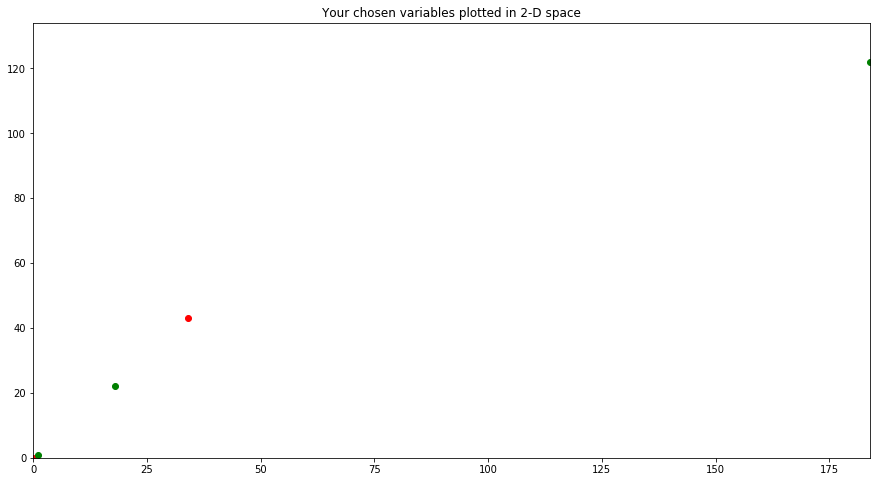

Indices of nearest neighbors: [1, 15, 4, 20, 13]
Values of nearest neighbors: 
   duration loudness   distance jazz
0      134       34  11.045361    0
1      153       13  23.409400    1
2      122       22  26.419690    1
3      164       16  26.870058    1
4      110       51  38.483763    0
The predicted value is 1


In [3]:
knn()

In [6]:
 music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

### Cross-Check Against Scikit-Learn Version:
This algorithm has been tested against the built-in Scikit-Learn version and agrees in all cases.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=5)

X = music[['duration', 'loudness']]
Y = music.jazz
neighbors.fit(X,Y)

neighbors.predict([[145,35]])

array([1], dtype=int64)